# Network analysis of Latin Streaming Artists from Billboard's weekly charts

In this notebook I will study the latin streaming songs network by year. Here I will analyze how the network has changed to become what it is now. I will study the network augmenting 2 years since the first two years, that is: First, I will study the network in the period 2013-2014, then I will add the period 2015-2016 to study the period (2013-2016) and so on, adding two years, until reaching the whole period 2013 - 2020.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import os

In [2]:
#First we load the data set
latin = pd.read_csv(r'https://raw.githubusercontent.com/Franciscojmara/Latin-Artists-Network/main/Data/network_latin_streaming.csv')
latin = latin.dropna()

# 1. Exploring the data.

### Gender representation by musical genre on weekly charts

In [3]:
#Change directory to save figures
os.chdir(r'C:\Users\Francisco Martínez\Desktop\Economía de redes\Trabajo final - Empírico\Imágenes')

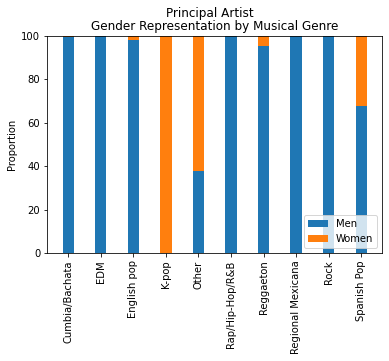

In [4]:
#First of all, let's see which is the proportion of male and female artists (principal)
labels = list(latin['Gen_Principal'].unique())
labels.sort()
men_means = list(latin.groupby('Gen_Principal')['Principal_Sex'].mean() * 100) #proportion of men by genre
women_means = list((1 - latin.groupby('Gen_Principal')['Principal_Sex'].mean()) * 100) #proportion of women by genre
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label = 'Men')
ax.bar(labels, women_means, width, bottom = men_means, label = 'Women')
ax.set_ylabel('Proportion')
ax.set_title('Gender Representation by Musical Genre')
ax.legend(loc='lower right')
plt.xticks(rotation=90)
plt.suptitle('Principal Artist')

plt.savefig('Principal Artist Gender.png', dpi = 300, bbox_inches='tight')

plt.show()

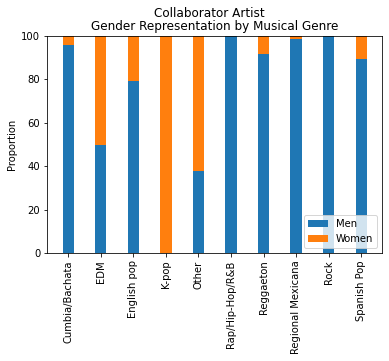

In [5]:
#Now, let's see which is the proportion of male and female artists (collaborator)
labels = list(latin['Gen_Collaborator'].unique())
labels.sort()
men_means = list(latin.groupby('Gen_Collaborator')['Collaborator_Sex'].mean() * 100) #proportion of men by genre
women_means = list((1 - latin.groupby('Gen_Collaborator')['Collaborator_Sex'].mean()) * 100) #proportion of women by genre
width = 0.35

fig, ax = plt.subplots()

ax.bar(labels, men_means, width, label = 'Men')
ax.bar(labels, women_means, width, bottom = men_means, label = 'Women')
ax.set_ylabel('Proportion')
ax.set_title('Gender Representation by Musical Genre')
ax.legend(loc='lower right')
plt.xticks(rotation=90)
plt.suptitle('Collaborator Artist')

plt.savefig('Collaborator Artist Gender.png', dpi = 300, bbox_inches='tight')

plt.show()

### Latin streaming songs' weeks on chart distribution

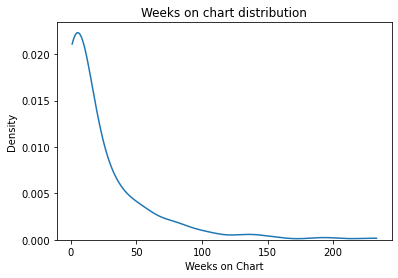

In [6]:
#Distribution of weeks on charts (all genres)
songs = latin.drop_duplicates(subset = ['Title', 'Weeks_in_chart'])
songs = latin[['Title', 'Weeks_in_chart', 'Gen_Principal']].groupby(['Title']).agg('max')
ax = sns.kdeplot(data = songs, x = 'Weeks_in_chart', cut = 0)
ax.set(xlabel = 'Weeks on Chart', title = 'Weeks on chart distribution')

plt.savefig('Weeks on chart distribution.png', dpi = 300, bbox_inches='tight')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

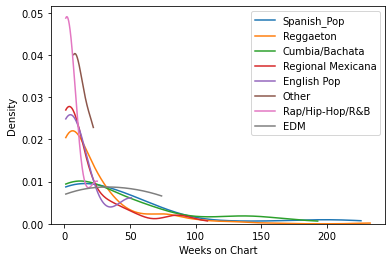

In [7]:
#Distribution of permanence in charts by musical genre

songs2 = latin.drop_duplicates(subset = ['Title', 'Weeks_in_chart'])
songs2 = songs2[['Title', 'Weeks_in_chart', 'Gen_Principal']].groupby(['Title']).agg('max')

x1 = songs2.loc[songs2.Gen_Principal=='Spanish Pop']
x2 = songs2.loc[songs2.Gen_Principal=='Reggaeton']
x3 = songs2.loc[songs2.Gen_Principal=='Cumbia/Bachata']
x4 = songs2.loc[songs2.Gen_Principal=='Regional Mexicana']
x5 = songs2.loc[songs2.Gen_Principal=='English pop']
x6 = songs2.loc[songs2.Gen_Principal=='K-pop']
x7 = songs2.loc[songs2.Gen_Principal=='Other']
x8 = songs2.loc[songs2.Gen_Principal=='Rock']
x9 = songs2.loc[songs2.Gen_Principal=='Rap/Hip-Hop/R&B']
x10 = songs2.loc[songs2.Gen_Principal=='EDM']


#Plot

sns.kdeplot(data = x1, x = 'Weeks_in_chart', label="Spanish_Pop", cut = 0)
plt.legend()
sns.kdeplot(data = x2, x = 'Weeks_in_chart', label="Reggaeton", cut = 0)
plt.legend()
sns.kdeplot(data = x3, x = 'Weeks_in_chart', label="Cumbia/Bachata", cut = 0)
plt.legend()
sns.kdeplot(data = x4, x = 'Weeks_in_chart', label="Regional Mexicana", cut = 0)
plt.legend()
sns.kdeplot(data = x5, x = 'Weeks_in_chart', label="English Pop", cut = 0)
plt.legend()
sns.kdeplot(data = x7, x = 'Weeks_in_chart', label="Other", cut = 0)
plt.legend()
sns.kdeplot(data = x9, x = 'Weeks_in_chart', label="Rap/Hip-Hop/R&B", cut = 0)
plt.legend()
sns.kdeplot(data = x10, x = 'Weeks_in_chart', label="EDM", cut = 0)
plt.legend()
plt.xlabel('Weeks on Chart')

plt.savefig('Weeks on chart by genre.png', dpi = 300, bbox_inches='tight')

plt.show

### Number of songs by genre

In [8]:
songs3 = latin.drop_duplicates(subset = ['Title', 'Gen_Principal'])
songs3 = songs3[['Year', 'Title', 'Gen_Principal']].groupby(['Year', 'Gen_Principal']).agg('count').reset_index()

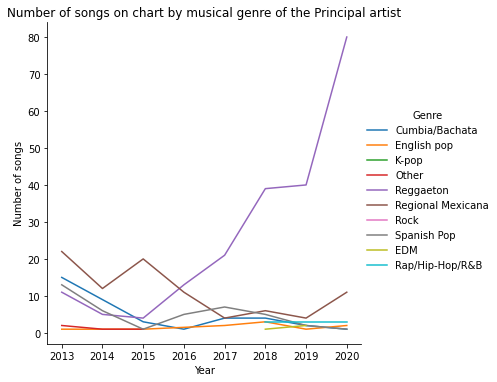

In [9]:
#Plot
ax = sns.relplot(data=songs3, x="Year", y="Title", hue="Gen_Principal", kind="line")
ax.set(ylabel='Number of songs', title = "Number of songs on chart by musical genre of the Principal artist")
ax._legend.set_title('Genre')

plt.savefig('No of songs per genre.png', dpi = 300, bbox_inches='tight')

plt.show(ax)

# 2. Latin-streaming songs: Network Analysis.

## 2013 - 2014

### 1. Network creation

In [10]:
years = [2013, 2014]
latin_2013 = latin[latin.Year.isin(years)]

In [11]:
print('DF lenght with duplicated songs:', len(latin_2013))
latin_2013 = latin_2013.drop_duplicates(subset = ['Title', 'Principal', 'Collaborator'])
print('DF length after removig duplicated songs:', len(latin_2013))

DF lenght with duplicated songs: 2380
DF length after removig duplicated songs: 109


In [12]:
#We prepare the edges for the network. Each singer represents a node.
singers = latin_2013[['Principal', 'Collaborator']]
singers.shape

(109, 2)

In [13]:
#Now we group the collaborations so we do not have repeated observations 
singers = singers.rename(columns = {'Principal': 'source', 'Collaborator': 'target'})
singers.head()

,source,target
0,Shakira,Wyclef Jean
1,Shakira,Freshlyground
2,Don Omar,Lucenzo
3,Michel Telo,Michel Telo
4,Shakira,El Cata


In [14]:
#Here we group by the principal artist and the collaborator and create a new column called weight, which is the number
#of times the source and target artists have colaborated
singers = singers.groupby(['source', 'target']).size().rename('weight').reset_index()
singers.head()

,source,target,weight
0,Alejandro Fernandez,Christina Aguilera,1
1,Arcangel,Arcangel,1
2,Aventura,Aventura,2
3,Banda El Recodo de Cruz Lizarraga,Banda El Recodo de Cruz Lizarraga,1
4,Banda Los Recoditos,Banda Los Recoditos,1


In [15]:
#We create the graph
G_2013 = nx.Graph()

In [16]:
#We prepare the nodes, which will be the list of all artists
nodes1 = list(singers['source'].unique())
nodes2 = list(singers['target'].unique())
nodes = nodes1 + nodes2
nodes = list(set(nodes))
print('Number of nodes', len(nodes))

Number of nodes 76


In [17]:
G_2013.add_nodes_from(nodes)
print('Number of nodes', len(G_2013))

Number of nodes 76


In [18]:
#No we add the edges
G_2013 = nx.from_pandas_edgelist(singers,
                            source='source',
                            target='target',
                            edge_attr='weight')

In [19]:
#Now we get the number of nodes and edges 
print('Number of nodes', len(G_2013))
print('Number of edges', len(G_2013.edges))

Number of nodes 76
Number of edges 76


In [20]:
#Now we print the number of conected components and node size in the components
print('Number of Conected Components, CC:', nx.number_connected_components(G_2013))
print('Node size:', [len(cc) for cc in nx.connected_components(G_2013)])

Number of Conected Components, CC: 46
Node size: [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 13, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3]


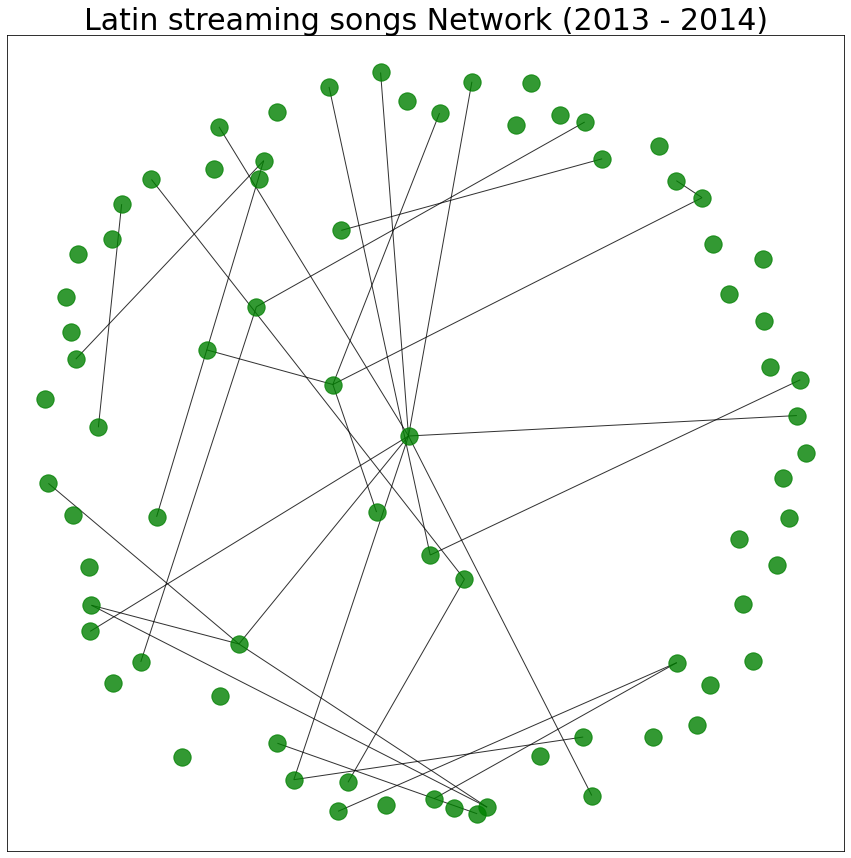

In [21]:
#Network at a glance
plt.figure(figsize=(15, 15))
pos = nx.spring_layout(G_2013, k = 1) #k parameter adjusts the distance among nodes
nx.draw_networkx(G_2013, pos = pos, with_labels = False, node_color = 'green', node_size = 300, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2014)', fontsize = 30)

plt.savefig('Ntwk 2013-2014.png', dpi = 300, bbox_inches='tight')

### 2. Degre Distribution

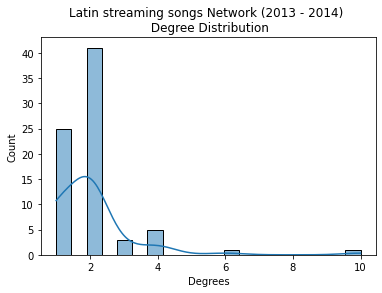

In [22]:
degree = pd.DataFrame(G_2013.degree, columns = ['source', 'degree']).sort_values('degree', ascending = False)
sns.histplot(degree['degree'], kde = True)
plt.title('Latin streaming songs Network (2013 - 2014) \n Degree Distribution')
plt.xlabel('Degrees')
plt.savefig('Degree distribution 2013.png', dpi = 300, bbox_inches='tight')

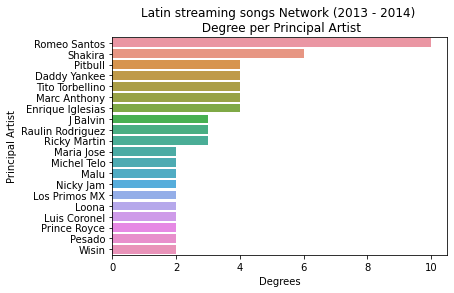

In [23]:
sns.barplot(x = 'degree', y = 'source', data = degree.head(20))
plt.ylabel('Principal Artist')
plt.xlabel('Degrees')
plt.title('Latin streaming songs Network (2013 - 2014) \n Degree per Principal Artist')
plt.savefig('Degree per artist 2013.png', dpi = 300, bbox_inches='tight')

### 3. Local centrality measures

In [24]:
#Betweenness
betweenness = nx.betweenness_centrality(G_2013, normalized = False)
betweenness = sorted(betweenness.items(), key = lambda x: x[1], reverse = True)[0:10]
betweenness

[('Romeo Santos', 59.0),
 ('Enrique Iglesias', 29.0),
 ('Marc Anthony', 11.0),
 ('Shakira', 9.0),
 ('Pitbull', 4.0),
 ('Daddy Yankee', 1.0),
 ('Tito Torbellino', 1.0),
 ('Wisin', 1.0),
 ('Wisin-Yandel', 1.0),
 ('Zion', 1.0)]

In [25]:
#Eigenvector centrality
eigenvector = nx.eigenvector_centrality(G_2013)
sorted(eigenvector.items(), key=lambda x: x[1], reverse = True)[0:10]

[('Romeo Santos', 0.716881656953974),
 ('Marc Anthony', 0.30901280852248203),
 ('Enrique Iglesias', 0.28112536732910587),
 ('Raulin Rodriguez', 0.2759516126396806),
 ('Anthony "El Mayimbe" Santos', 0.19925263932745718),
 ('Carlos Santana', 0.19925263932745718),
 ('Drake', 0.19925263932745718),
 ('Luis Varges', 0.19925263932745718),
 ('Usher', 0.19925263932745718),
 ('Descemer Bueno', 0.10821451380704161)]

In [26]:
#Closeness
closeness = nx.closeness_centrality(G_2013)
closeness = sorted(closeness.items(), key=lambda x: x[1], reverse = True)[0:10]
closeness

[('Romeo Santos', 0.12),
 ('Enrique Iglesias', 0.09142857142857143),
 ('Marc Anthony', 0.0768),
 ('Raulin Rodriguez', 0.07111111111111111),
 ('Anthony "El Mayimbe" Santos', 0.07111111111111111),
 ('Carlos Santana', 0.07111111111111111),
 ('Drake', 0.07111111111111111),
 ('Luis Varges', 0.07111111111111111),
 ('Usher', 0.07111111111111111),
 ('Descemer Bueno', 0.06193548387096774)]

In [27]:
#Local clustering 

#find the nodes with the most triangles
triangles = nx.triangles(G_2013) 
triangles = sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]
triangles

[('Descemer Bueno', 1),
 ('Gente de Zona', 1),
 ('Enrique Iglesias', 1),
 ('Alejandro Fernandez ', 0),
 ('Christina Aguilera', 0),
 ('Arcangel', 0),
 ('Aventura', 0),
 ('Banda El Recodo de Cruz Lizarraga', 0),
 ('Banda Los Recoditos', 0),
 ('Banda Sinaloense MS de Sergio Lizarraga', 0)]

In [28]:
#Local clustering

#Now, we can use clustering() to find the local clustering coefficient for these nodes:
clustering = nx.clustering(G_2013)
clustering = [(x, clustering[x]) for x in sorted(nodes, key=lambda x: eigenvector[x], reverse=True)[0:10]]
clustering

[('Romeo Santos', 0),
 ('Marc Anthony', 0),
 ('Enrique Iglesias', 0.16666666666666666),
 ('Raulin Rodriguez', 0),
 ('Luis Varges', 0),
 ('Usher', 0),
 ('Anthony "El Mayimbe" Santos', 0),
 ('Carlos Santana', 0),
 ('Drake', 0),
 ('Descemer Bueno', 1.0)]

### 4 Global structure of the network

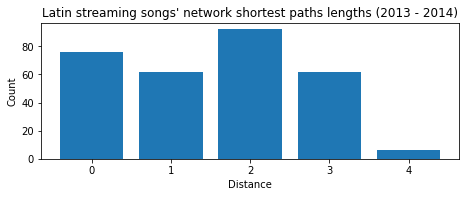

In [29]:
#Path length histogram

#First we create a function
def path_length_histogram(G, title = None): 
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G)) 
    # Convert dict of dicts to flat list 
    all_shortest = sum([
        list(length_target.values()) 
        for length_target
        in length_source_target.values()], 
    [])
    # Calculate integer bins 
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)] 
    # Plot histogram
    plt.hist(all_shortest, bins=bins, rwidth=0.8) 
    plt.title(title) 
    plt.xlabel("Distance") 
    plt.ylabel("Count")
    
#Now we create the histogram
plt.figure(figsize=(7.5, 2.5))
path_length_histogram(G_2013, title = "Latin streaming songs' network shortest paths lengths (2013 - 2014)")

plt.savefig('Shortest paths lengths 2013.png', dpi = 300, bbox_inches='tight')

plt.show()

In [30]:
#In the same sense of finding the shortest paths, I now calculate the mean shortest path, also known as the
#characteristic length of the giant component (because the whole graph is not connected)

gGcc = sorted(nx.connected_components(G_2013), key=len, reverse=True)
G0_2013 = G_2013.subgraph(gGcc[0]) #giant component
avg_shortest_path_length_2013 = nx.average_shortest_path_length(G0_2013)
avg_shortest_path_length_2013

2.269230769230769

In [31]:
#Diameter (largest path length) of the giant component
diameter = nx.diameter(G0_2013)
diameter

4

In [32]:
#Global clustering (giant component)
g_clustering = nx.average_clustering(G0_2013)
g_clustering

0.16666666666666666

In [33]:
#Resilence ---> density
density = nx.density(G0_2013)
density

0.20512820512820512

In [34]:
#Connectivity (of the giant component)
import networkx.algorithms.connectivity as nxcon
print('Min node cut:', nxcon.minimum_node_cut(G0_2013))
print('Min edge cut:', nxcon.minimum_edge_cut(G0_2013))

Min node cut: {'Romeo Santos'}
Min edge cut: {('Romeo Santos', 'Luis Varges')}


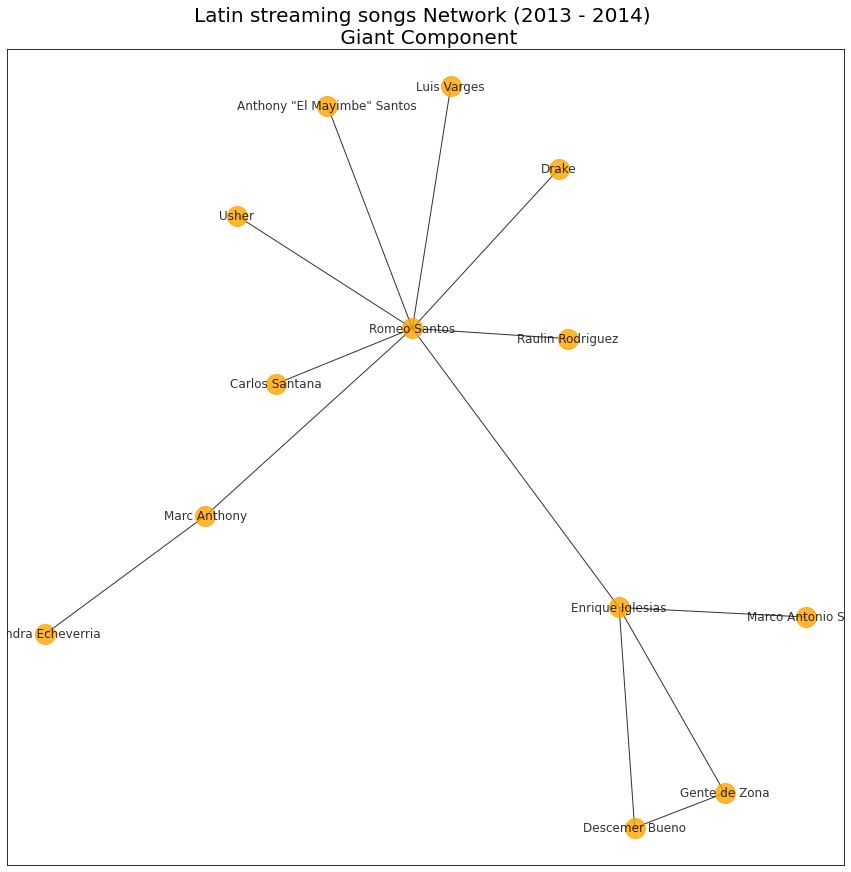

In [35]:
#Graph giant component
plt.figure(figsize=(15, 15))
pos2 = nx.spring_layout(G0_2013, k = 0.5)
nx.draw_networkx(G0_2013, pos = pos2, with_labels = True, node_color = 'orange', node_size = 400, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2014) \n Giant Component', fontsize = 20)

plt.savefig('Giant Component 2013-2014.png', dpi = 300, bbox_inches='tight')

### 5 Community detection

In [36]:
from networkx.algorithms.community import greedy_modularity_communities
#In order to find the communities, I will use the giant component only
communities = sorted(greedy_modularity_communities(G0_2013), key = len, reverse = True) 
# Count the communities 
comm = len(communities)
comm

4

In [37]:
#We will be using some helper functions to visualize the 6 communities
def set_node_community(G, communities): 
    '''Add community to node attributes''' 
    for c, v_c in enumerate(communities): 
        for v in v_c:
        # Add 1 to save 0 for external edges 
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
        # External edge, mark as 0 
            G.edges[v, w]['community'] = 0

def get_color(i, r_off = 1, g_off = 1, b_off = 1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1) 
    g = low + span * (((i + g_off) * 5) % n) / (n - 1) 
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return(r, g, b)

In [38]:
#Now that these helper functions have been defined, the following code can be used to annotate nodes and edges 
#with their communities, and find the corresponding colors:

# Set node and edge communities
set_node_community(G0_2013, communities) 
set_edge_community(G0_2013)

#Set community color for nodes 
node_color = [
    get_color(G0_2013.nodes[v]['community']) 
    for v in G0_2013.nodes]

# Set community color for external and internal edges
external = [
    (v, w) for v, w in G0_2013.edges 
    if G0_2013.edges[v, w]['community'] == 0]

internal = [
    (v, w) for v, w in G0_2013.edges 
    if G0_2013.edges[v, w]['community'] > 0]

internal_color = [
    get_color(G0_2013.edges[e]['community']) 
    for e in internal]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

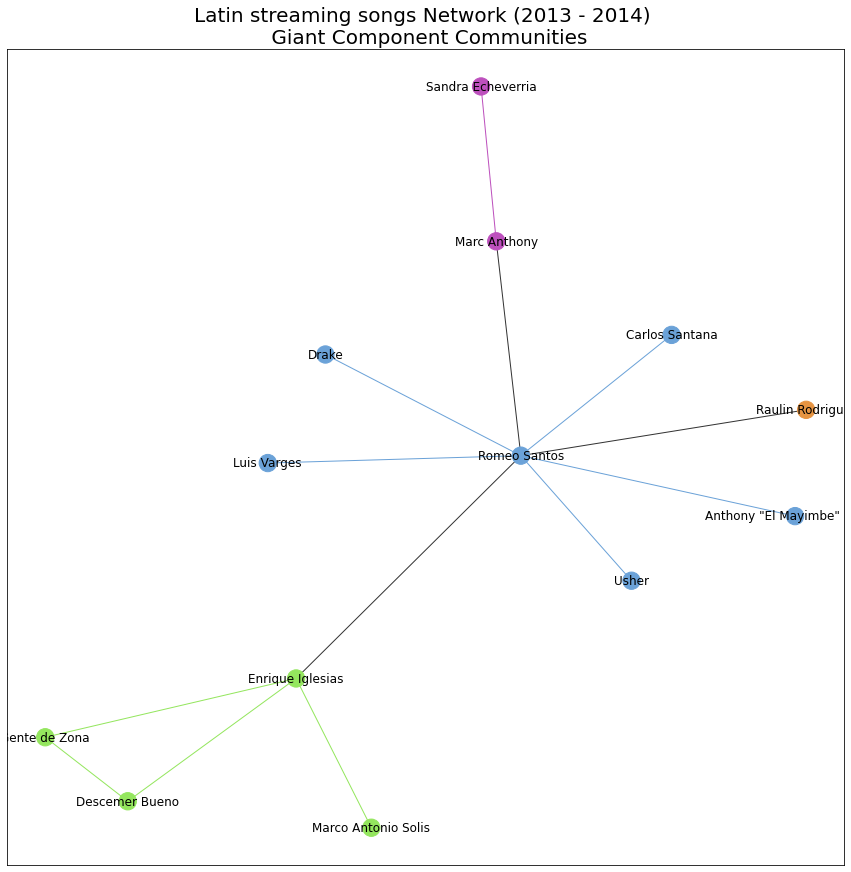

In [39]:
#Now, finally, let's visualize the graph with the communities
plt.figure(figsize=(15, 15))
pos3 = nx.spring_layout(G0_2013, k = 0.5)
# Draw external edges
nx.draw_networkx(G0_2013, pos = pos3, node_size = 0, edgelist = external, edge_color = "#333333", with_labels = False)
# Draw nodes and internal edges
nx.draw_networkx(G0_2013, pos = pos3, node_color = node_color, edgelist = internal, edge_color = internal_color, 
                with_labels = True)
plt.title('Latin streaming songs Network (2013 - 2014) \n Giant Component Communities', fontsize = 20)

plt.savefig('Communities Giant Component 2013-2014.png', dpi = 300, bbox_inches='tight')

plt

## 2013 - 2016

### 1. Network Creation

In [40]:
years = [2013, 2014, 2015, 2016]
latin_2016 = latin[latin.Year.isin(years)]

In [41]:
print('DF lenght with duplicated songs:', len(latin_2016))
latin_2016 = latin_2016.drop_duplicates(subset = ['Title', 'Principal', 'Collaborator'])
print('DF length after removig duplicated songs:', len(latin_2016))

DF lenght with duplicated songs: 5170
DF length after removig duplicated songs: 181


In [42]:
#We prepare the edges for the network. Each singer represents a node.
singers = latin_2016[['Principal', 'Collaborator']]
singers = singers.rename(columns = {'Principal': 'source', 'Collaborator': 'target'})
singers.shape

(181, 2)

In [43]:
singers = singers.groupby(['source', 'target']).size().rename('weight').reset_index()

In [44]:
#create the graph
G_2016 = nx.Graph()

In [45]:
#We prepare the nodes, which will be the list of all artists
nodes1 = list(singers['source'].unique())
nodes2 = list(singers['target'].unique())
nodes = nodes1 + nodes2
nodes = list(set(nodes))

#Add the nodes to the graph
G_2016.add_nodes_from(nodes)

#No we add the edges
G_2016 = nx.from_pandas_edgelist(singers,
                            source='source',
                            target='target',
                            edge_attr='weight')

#Now we get the number of nodes and edges 
print('Number of nodes', len(G_2016))
print('Number of edges', len(G_2016.edges))

Number of nodes 111
Number of edges 117


In [46]:
#Now we print the number of conected components and node size in the components
print('Number of Conected Components, CC:', nx.number_connected_components(G_2016))
print('Node size:', [len(cc) for cc in nx.connected_components(G_2016)])

Number of Conected Components, CC: 53
Node size: [2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 38, 1, 5, 1, 1, 1, 1, 1, 7, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3]


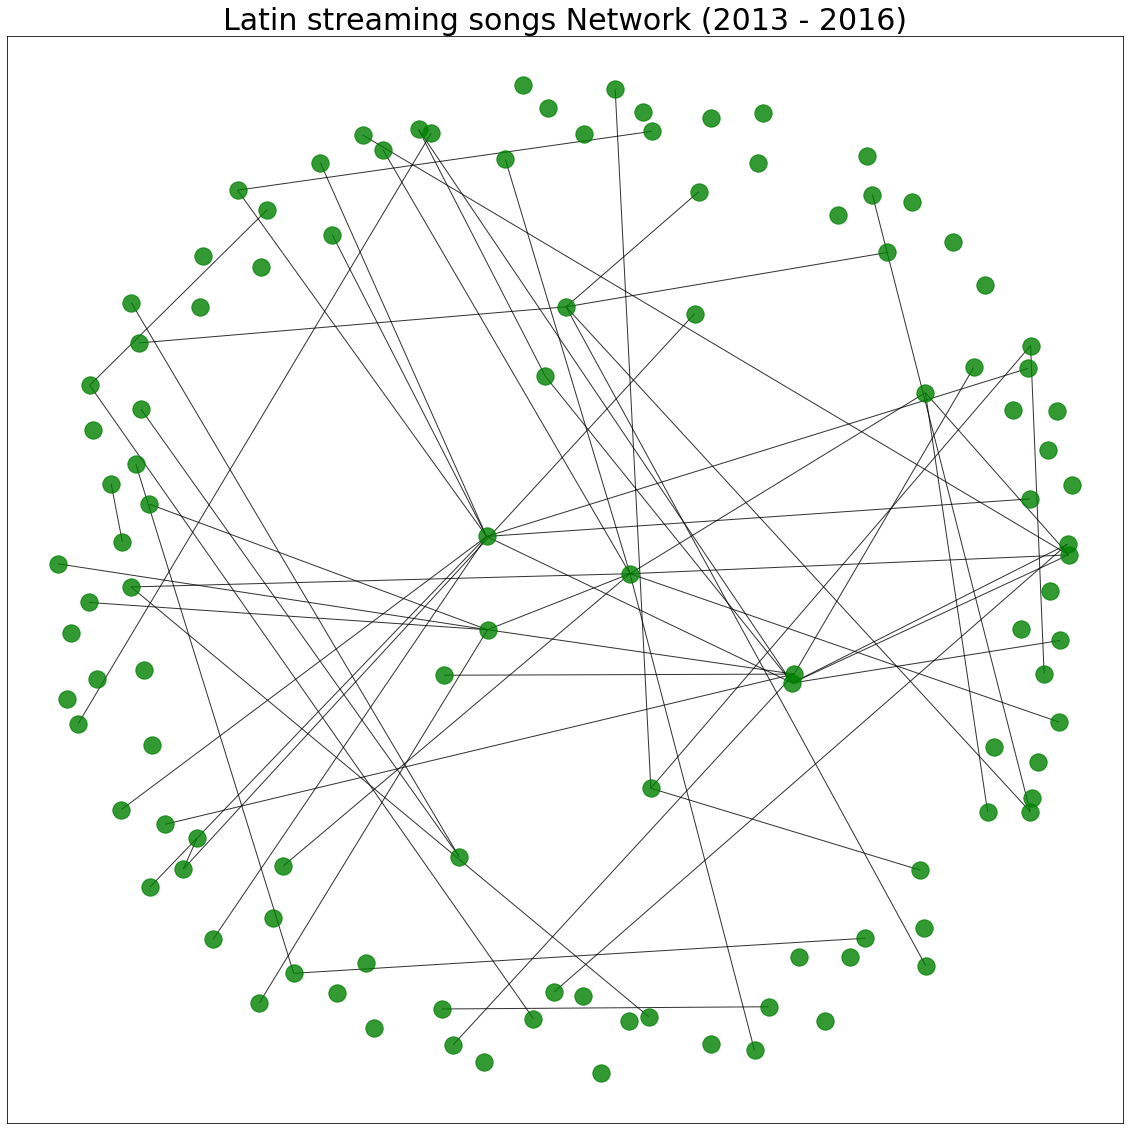

In [47]:
#Network at a glance
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_2016, k = 1) #k parameter adjusts the distance among nodes
nx.draw_networkx(G_2016, pos = pos, with_labels = False, node_color = 'green', node_size = 300, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2016)', fontsize = 30)

plt.savefig('Ntwk 2013-2016.png', dpi = 300, bbox_inches='tight')

### 2. Degree distribution

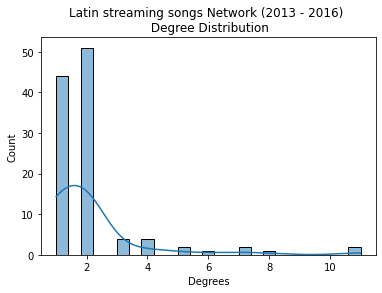

In [48]:
degree_2016 = pd.DataFrame(G_2016.degree, columns = ['source', 'degree']).sort_values('degree', ascending = False)
sns.histplot(degree_2016['degree'], kde = True)
plt.title('Latin streaming songs Network (2013 - 2016) \n Degree Distribution')
plt.xlabel('Degrees')
plt.savefig('Degree distribution 2016.png', dpi = 300, bbox_inches='tight')

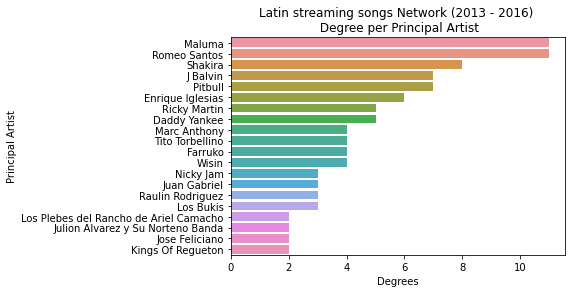

In [49]:
sns.barplot(x = 'degree', y = 'source', data = degree_2016.head(20))
plt.ylabel('Principal Artist')
plt.xlabel('Degrees')
plt.title('Latin streaming songs Network (2013 - 2016) \n Degree per Principal Artist')
plt.savefig('Degree per artist 2016.png', dpi = 300, bbox_inches='tight')

### 3. Local centrality measures

In [50]:
#Betweenness
betweenness_2016 = nx.betweenness_centrality(G_2016, normalized = False)
betweenness_2016 = sorted(betweenness_2016.items(), key = lambda x: x[1], reverse = True)[0:10]
betweenness_2016

[('Maluma', 430.0),
 ('Enrique Iglesias', 388.0),
 ('Wisin', 356.0),
 ('Romeo Santos', 287.0),
 ('Shakira', 278.0),
 ('Pitbull', 138.0),
 ('Don Omar', 36.0),
 ('Marco Antonio Solis', 36.0),
 ('Marc Anthony', 36.0),
 ('Ricky Martin', 36.0)]

In [51]:
#Closeness
closeness_2016 = nx.closeness_centrality(G_2016)
closeness_2016 = sorted(closeness_2016.items(), key=lambda x: x[1], reverse = True)[0:10]
closeness_2016

[('Wisin', 0.1310047846889952),
 ('Maluma', 0.1310047846889952),
 ('Enrique Iglesias', 0.12322232223222322),
 ('Ricky Martin', 0.11212121212121212),
 ('Shakira', 0.11013676588897828),
 ('Romeo Santos', 0.10458365164247517),
 ('Don Omar', 0.09647639182522903),
 ('Bryant Myers', 0.09500346981263012),
 ('Fifth Harmony', 0.09500346981263012),
 ('Juhn', 0.09500346981263012)]

In [52]:
#Local clustering 

#find the nodes with the most triangles
triangles_2016 = nx.triangles(G_2016) 
triangles_2016 = sorted(triangles_2016.items(), key=lambda x:x[1], reverse=True)[0:10]
triangles_2016

[('Descemer Bueno', 1),
 ('Gente de Zona', 1),
 ('Enrique Iglesias', 1),
 ('Wisin', 1),
 ('Maluma', 1),
 ('Ricky Martin', 1),
 ('Alejandro Fernandez ', 0),
 ('Christina Aguilera', 0),
 ('Arcangel', 0),
 ('Ariel Camacho y Los Plebes del Rancho', 0)]

### 4. Global structure of the network

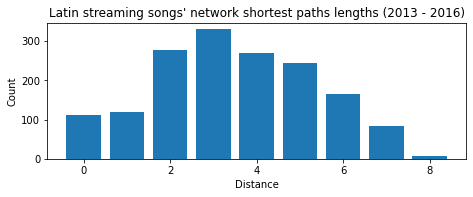

In [55]:
#Path length histogram   
#Now we create the histogram
plt.figure(figsize=(7.5, 2.5))
path_length_histogram(G_2016, title = "Latin streaming songs' network shortest paths lengths (2013 - 2016)")

plt.savefig('Shortest paths lengths 2016.png', dpi = 300, bbox_inches='tight')

plt.show()

In [56]:
#In the same sense of finding the shortest paths, I now calculate the mean shortest path, also known as the
#characteristic length of the giant component (because the whole graph is not connected)

gGcc = sorted(nx.connected_components(G_2016), key=len, reverse=True)
G0_2016 = G_2016.subgraph(gGcc[0]) #giant component
average_shortest_path_length_2016 = nx.average_shortest_path_length(G0_2016)
average_shortest_path_length_2016

3.874822190611664

In [57]:
#Diameter (largest path length) of the giant component
diameter_2016 = nx.diameter(G0_2016)
diameter_2016

8

In [58]:
#Global clustering (giant component)
g_clustering_2016 = nx.average_clustering(G0_2016)
g_clustering_2016

0.0682748538011696

In [59]:
#Resilence ---> density
density_2016 = nx.density(G0_2016)
density_2016

0.06827880512091039

In [60]:
#Connectivity (of the giant component)
print('Min node cut:', nxcon.minimum_node_cut(G0_2016))
print('Min edge cut:', nxcon.minimum_edge_cut(G0_2016))

Min node cut: {'Shakira'}
Min edge cut: {('Shakira', 'Freshlyground')}


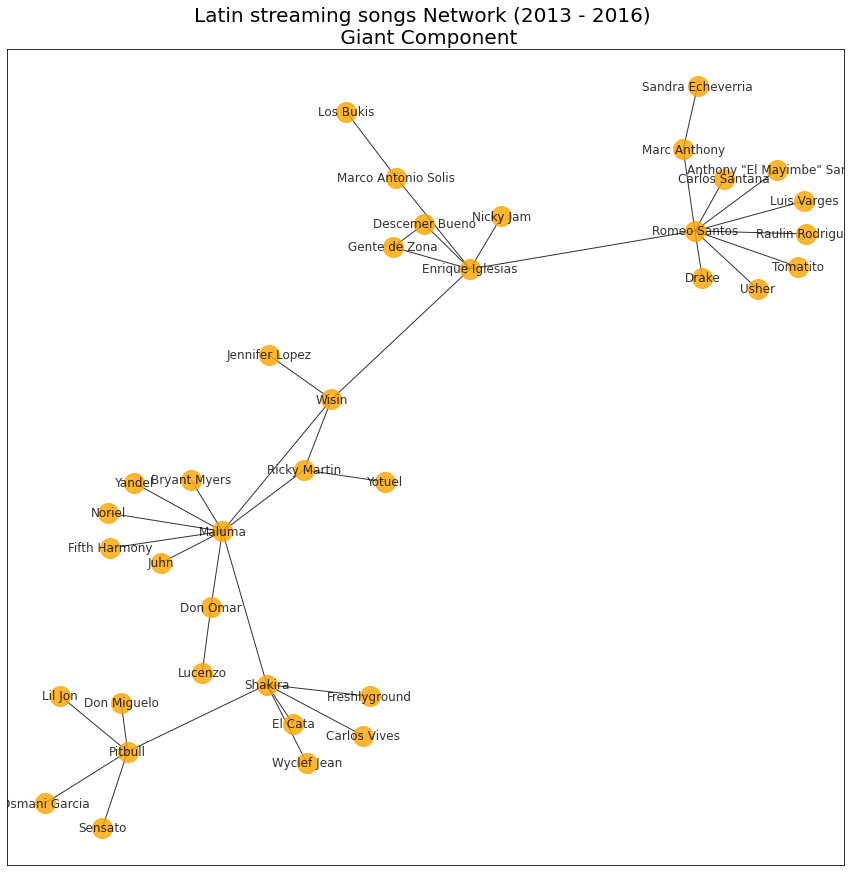

In [61]:
#Graph giant component
plt.figure(figsize=(15, 15))
pos2 = nx.spring_layout(G0_2016, k = 0.2)
nx.draw_networkx(G0_2016, pos = pos2, with_labels = True, node_color = 'orange', node_size = 400, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2016) \n Giant Component', fontsize = 20)

plt.savefig('Giant Component 2013-2016.png', dpi = 300, bbox_inches='tight')

### 5. Comunity detection

In [62]:
#In order to find the communities, I will use the giant component only
communities = sorted(greedy_modularity_communities(G0_2016), key = len, reverse = True) 
# Count the communities 
comm_2016 = len(communities)
comm_2016

5

In [63]:
#Now that these helper functions have been defined, the following code can be used to annotate nodes and edges 
#with their communities, and find the corresponding colors:

# Set node and edge communities
set_node_community(G0_2016, communities) 
set_edge_community(G0_2016)

#Set community color for nodes 
node_color = [get_color(G0_2016.nodes[v]['community']) for v in G0_2016.nodes]

# Set community color for external and internal edges
external = [(v, w) for v, w in G0_2016.edges if G0_2016.edges[v, w]['community'] == 0]

internal = [(v, w) for v, w in G0_2016.edges if G0_2016.edges[v, w]['community'] > 0]

internal_color = [get_color(G0_2016.edges[e]['community']) for e in internal]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

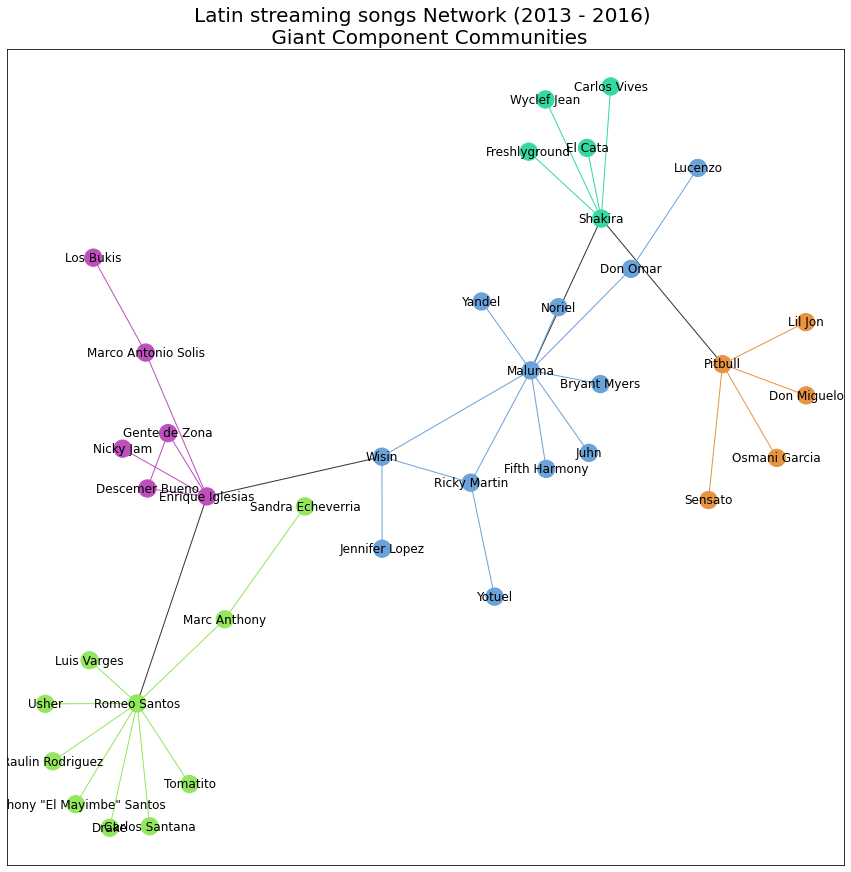

In [64]:
plt.figure(figsize=(15, 15))
pos3 = nx.spring_layout(G0_2016, k = 0.2)
# Draw external edges
nx.draw_networkx(G0_2016, pos = pos3, node_size = 0, edgelist = external, edge_color = "#333333", with_labels = False)
# Draw nodes and internal edges
nx.draw_networkx(G0_2016, pos = pos3, node_color = node_color, edgelist = internal, edge_color = internal_color, 
                with_labels = True)
plt.title('Latin streaming songs Network (2013 - 2016) \n Giant Component Communities', fontsize = 20)

plt.savefig('Communities Giant Component 2013-2016.png', dpi = 300, bbox_inches='tight')

plt

## 2013 - 2018

### 1. Network creation

In [65]:
years = [2013, 2014, 2015, 2016, 2017, 2018]
latin_2018 = latin[latin.Year.isin(years)]

In [66]:
print('DF lenght with duplicated songs:', len(latin_2018))
latin_2018 = latin_2018.drop_duplicates(subset = ['Title', 'Principal', 'Collaborator'])
print('DF length after removig duplicated songs:', len(latin_2018))

DF lenght with duplicated songs: 8752
DF length after removig duplicated songs: 322


In [67]:
#We prepare the edges for the network. Each singer represents a node.
singers = latin_2018[['Principal', 'Collaborator']]
singers = singers.rename(columns = {'Principal': 'source', 'Collaborator': 'target'})
singers.shape

(322, 2)

In [68]:
singers = singers.groupby(['source', 'target']).size().rename('weight').reset_index()

In [69]:
#create the graph
G_2018 = nx.Graph()

In [70]:
#We prepare the nodes, which will be the list of all artists
nodes1 = list(singers['source'].unique())
nodes2 = list(singers['target'].unique())
nodes = nodes1 + nodes2
nodes = list(set(nodes))

#Add the nodes to the graph
G_2018.add_nodes_from(nodes)

#No we add the edges
G_2018 = nx.from_pandas_edgelist(singers,
                            source='source',
                            target='target',
                            edge_attr='weight')

#Now we get the number of nodes and edges 
print('Number of nodes', len(G_2018))
print('Number of edges', len(G_2018.edges))

Number of nodes 174
Number of edges 220


In [71]:
#Now we print the number of conected components and node size in the components
print('Number of Conected Components, CC:', nx.number_connected_components(G_2018))
print('Node size:', [len(cc) for cc in nx.connected_components(G_2018)])

Number of Conected Components, CC: 59
Node size: [106, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3]


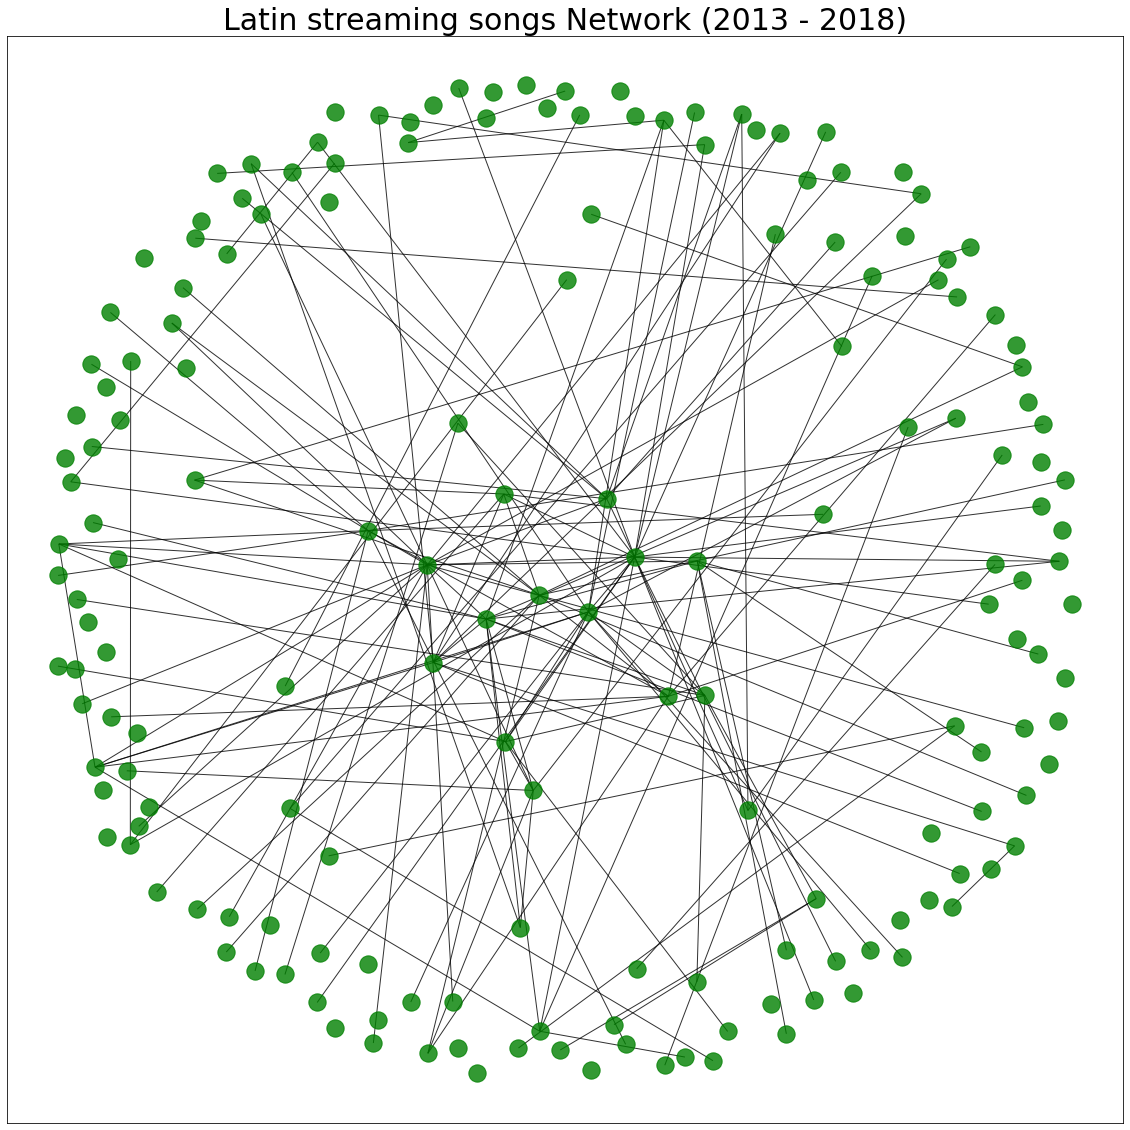

In [72]:
#Network at a glance
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_2018, k = 1) #k parameter adjusts the distance among nodes
nx.draw_networkx(G_2018, pos = pos, with_labels = False, node_color = 'green', node_size = 300, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2018)', fontsize = 30)

plt.savefig('Ntwk 2013-2018.png', dpi = 300, bbox_inches='tight')

### 2. Degree distribution

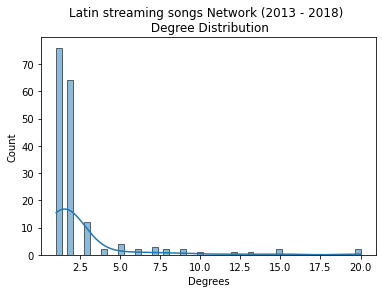

In [73]:
degree_2018 = pd.DataFrame(G_2018.degree, columns = ['source', 'degree']).sort_values('degree', ascending = False)
sns.histplot(degree_2018['degree'], kde = True)
plt.title('Latin streaming songs Network (2013 - 2018) \n Degree Distribution')
plt.xlabel('Degrees')
plt.savefig('Degree distribution 2018.png', dpi = 300, bbox_inches='tight')

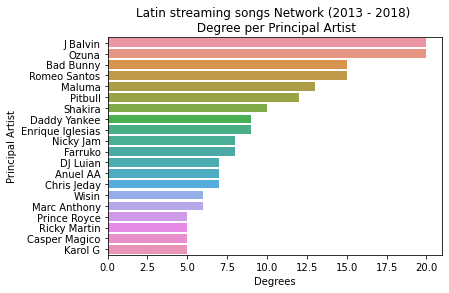

In [74]:
sns.barplot(x = 'degree', y = 'source', data = degree_2018.head(20))
plt.ylabel('Principal Artist')
plt.xlabel('Degrees')
plt.title('Latin streaming songs Network (2013 - 2018) \n Degree per Principal Artist')
plt.savefig('Degree per artist 2018.png', dpi = 300, bbox_inches='tight')

### 3. Local centrality measures

In [75]:
#Betweenness
betweenness_2018 = nx.betweenness_centrality(G_2018, normalized = False)
betweenness_2018 = sorted(betweenness_2018.items(), key = lambda x: x[1], reverse = True)[0:10]
betweenness_2018

[('Ozuna', 1936.7472222222202),
 ('J Balvin', 1781.5896825396826),
 ('Romeo Santos', 1104.4988095238098),
 ('Bad Bunny', 1061.2587301587303),
 ('Maluma', 816.7476190476186),
 ('Pitbull', 786.4142857142859),
 ('Daddy Yankee', 720.9833333333331),
 ('Wisin', 679.3019841269839),
 ('Enrique Iglesias', 660.060317460318),
 ('Shakira', 598.5920634920635)]

In [76]:
#Eigenvector centrality
eigenvector = nx.eigenvector_centrality(G_2018)
sorted(eigenvector.items(), key=lambda x: x[1], reverse = True)[0:10]

[('J Balvin', 0.42518650438651245),
 ('Ozuna', 0.36032744927930577),
 ('Bad Bunny', 0.3381654615253419),
 ('Romeo Santos', 0.27351085197527064),
 ('Nicky Jam', 0.2318028192586634),
 ('Karol G', 0.19887279784059028),
 ('Anuel AA', 0.18093433198964198),
 ('Enrique Iglesias', 0.17391542148054245),
 ('DJ Luian', 0.1700710036725917),
 ('Pitbull', 0.15651405652648892)]

In [77]:
#Closeness
closeness_2018 = nx.closeness_centrality(G_2018)
closeness_2018 = sorted(closeness_2018.items(), key=lambda x: x[1], reverse = True)[0:10]
closeness_2018

[('J Balvin', 0.26225647612930847),
 ('Ozuna', 0.2580094076899675),
 ('Bad Bunny', 0.23603082851637763),
 ('Nicky Jam', 0.23173935890698896),
 ('Romeo Santos', 0.2308997235486303),
 ('Anuel AA', 0.22439550598388017),
 ('DJ Luian', 0.22439550598388017),
 ('Enrique Iglesias', 0.21824768390213),
 ('Karol G', 0.21750281126082582),
 ('Almighty', 0.21457348046943422)]

In [78]:
#Local clustering 

#find the nodes with the most triangles
triangles_2018 = nx.triangles(G_2018) 
triangles_2018 = sorted(triangles_2018.items(), key=lambda x:x[1], reverse=True)[0:10]
triangles_2018

[('J Balvin', 6),
 ('Ozuna', 5),
 ('Bad Bunny', 4),
 ('Romeo Santos', 3),
 ('Karol G', 3),
 ('Anuel AA', 2),
 ('Wisin', 2),
 ('Nicky Jam', 2),
 ('Chris Jeday', 2),
 ('Cardi B', 2)]

In [79]:
#Local clustering

#Now, we can use clustering() to find the local clustering coefficient for these nodes:
clustering = nx.clustering(G_2018)
[(x, clustering[x]) for x in sorted(nodes, key=lambda x:eigenvector[x], reverse=True)[0:10]]

[('J Balvin', 0.0392156862745098),
 ('Ozuna', 0.032679738562091505),
 ('Bad Bunny', 0.05128205128205128),
 ('Romeo Santos', 0.038461538461538464),
 ('Nicky Jam', 0.13333333333333333),
 ('Karol G', 0.3),
 ('Anuel AA', 0.09523809523809523),
 ('Enrique Iglesias', 0.05555555555555555),
 ('DJ Luian', 0.09523809523809523),
 ('Pitbull', 0.022222222222222223)]

### 4. Global Structure of the network

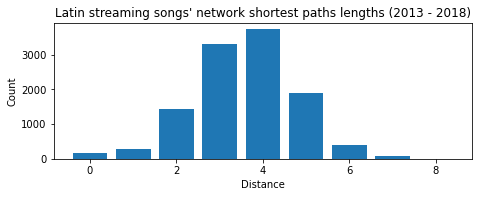

In [80]:
#Path length histogram   
#Now we create the histogram
plt.figure(figsize=(7.5, 2.5))
path_length_histogram(G_2018, title = "Latin streaming songs' network shortest paths lengths (2013 - 2018)")

plt.savefig('Shortest paths lengths 2018.png', dpi = 300, bbox_inches='tight')

plt.show()

In [81]:
#In the same sense of finding the shortest paths, I now calculate the mean shortest path, also known as the
#characteristic length of the giant component (because the whole graph is not connected)

gGcc = sorted(nx.connected_components(G_2018), key=len, reverse=True)
G0_2018 = G_2018.subgraph(gGcc[0]) #giant component
average_shortest_path_length_2018 = nx.average_shortest_path_length(G0_2018)
average_shortest_path_length_2018

3.6379155435759207

In [82]:
#Diameter (largest path length) of the giant component
diameter_2018 = nx.diameter(G0_2018)
diameter_2018

8

In [83]:
#Global clustering (giant component)
g_clustering_2018 = nx.average_clustering(G0_2018)
g_clustering_2018

0.052938629381470655

In [84]:
#Resilence ---> density
density_2018 = nx.density(G0_2018)
density_2018

0.028032345013477088

In [85]:
#Connectivity (of the giant component)
print('Min node cut:', nxcon.minimum_node_cut(G0_2018))
print('Min edge cut:', nxcon.minimum_edge_cut(G0_2018))

Min node cut: {'J Balvin'}
Min edge cut: {('Farruko', 'Ky-Mani Marley')}


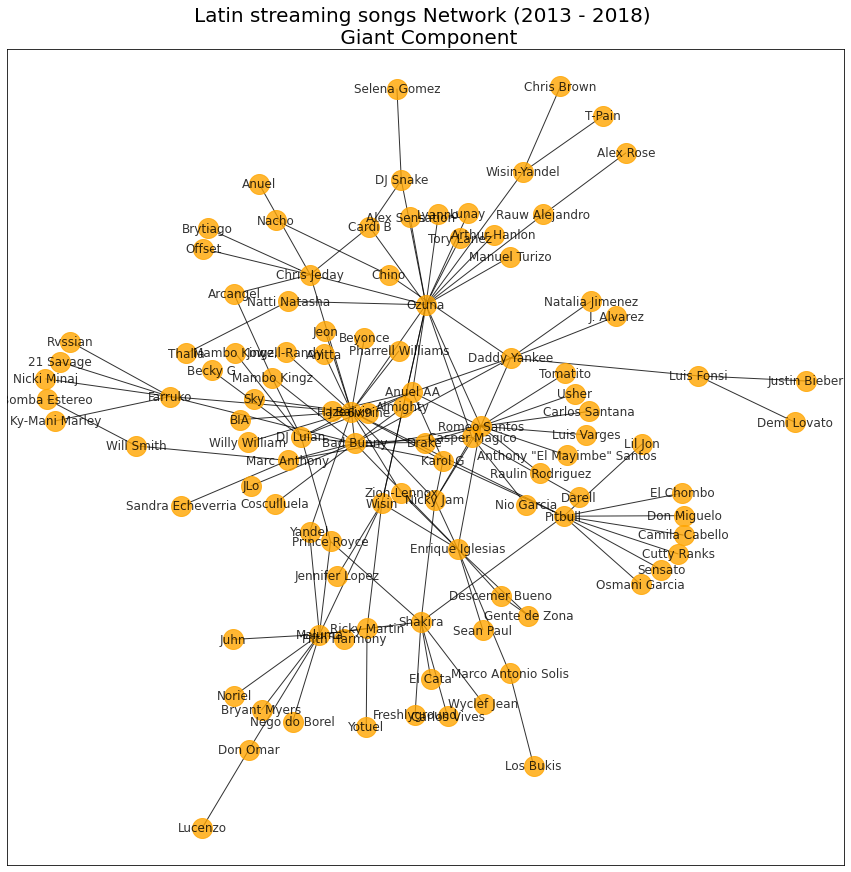

In [86]:
#Graph giant component
plt.figure(figsize=(15, 15))
pos2 = nx.spring_layout(G0_2018, k = 0.2)
nx.draw_networkx(G0_2018, pos = pos2, with_labels = True, node_color = 'orange', node_size = 400, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2018) \n Giant Component', fontsize = 20)

plt.savefig('Giant Component 2013-2018.png', dpi = 300, bbox_inches='tight')

### 5. Comunity detection

In [87]:
#In order to find the communities, I will use the giant component only
communities = sorted(greedy_modularity_communities(G0_2018), key = len, reverse = True) 
# Count the communities 
comm_2018 = len(communities)
comm_2018

9

In [88]:
#Now that these helper functions have been defined, the following code can be used to annotate nodes and edges 
#with their communities, and find the corresponding colors:

# Set node and edge communities
set_node_community(G0_2018, communities) 
set_edge_community(G0_2018)

#Set community color for nodes 
node_color = [get_color(G0_2018.nodes[v]['community']) for v in G0_2018.nodes]

# Set community color for external and internal edges
external = [(v, w) for v, w in G0_2018.edges if G0_2018.edges[v, w]['community'] == 0]

internal = [(v, w) for v, w in G0_2018.edges if G0_2018.edges[v, w]['community'] > 0]

internal_color = [get_color(G0_2018.edges[e]['community']) for e in internal]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

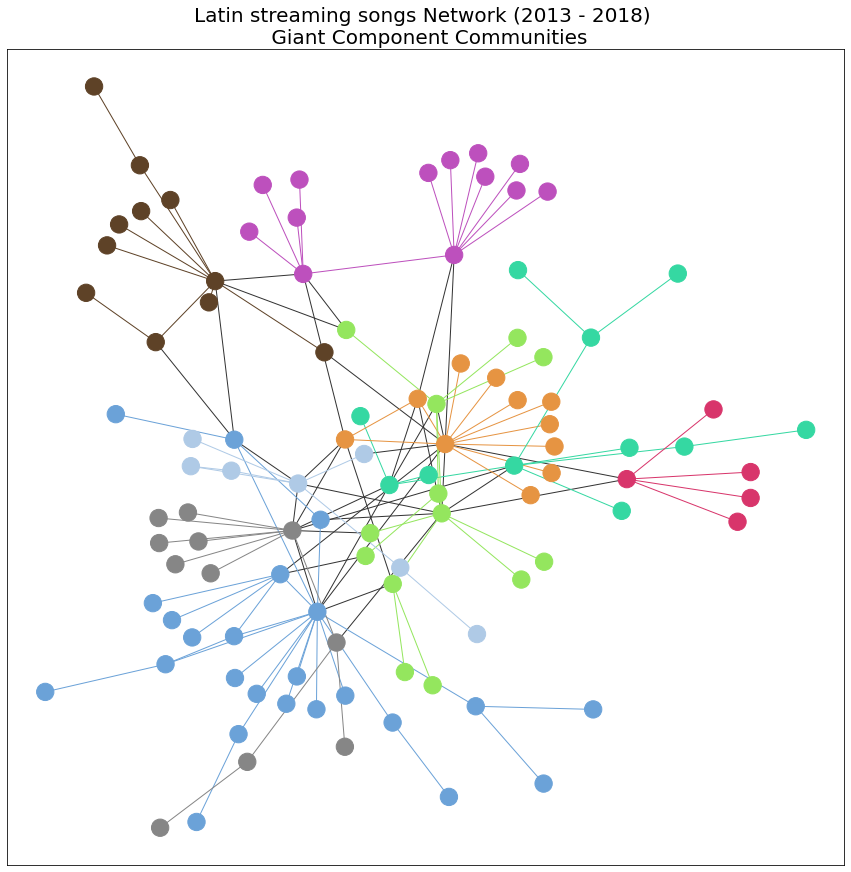

In [89]:
plt.figure(figsize=(15, 15))
pos3 = nx.spring_layout(G0_2018, k = 0.2)
# Draw external edges
nx.draw_networkx(G0_2018, pos = pos3, node_size = 0, edgelist = external, edge_color = "#333333", with_labels = False)
# Draw nodes and internal edges
nx.draw_networkx(G0_2018, pos = pos3, node_color = node_color, edgelist = internal, edge_color = internal_color, 
                with_labels = False)
plt.title('Latin streaming songs Network (2013 - 2018) \n Giant Component Communities', fontsize = 20)

plt.savefig('Communities Giant Component 2013-2018.png', dpi = 300, bbox_inches='tight')

plt

## 2013 - 2020

### 1. Network creation

In [90]:
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
latin_2020 = latin[latin.Year.isin(years)]

In [91]:
print('DF lenght with duplicated songs:', len(latin_2020))
latin_2020 = latin_2020.drop_duplicates(subset = ['Title', 'Principal', 'Collaborator'])
print('DF length after removig duplicated songs:', len(latin_2020))

DF lenght with duplicated songs: 13037
DF length after removig duplicated songs: 520


In [92]:
#We prepare the edges for the network. Each singer represents a node.
singers = latin_2020[['Principal', 'Collaborator']]
singers = singers.rename(columns = {'Principal': 'source', 'Collaborator': 'target'})
singers.shape

(520, 2)

In [93]:
singers = singers.groupby(['source', 'target']).size().rename('weight').reset_index()

In [94]:
#create the graph
G_2020 = nx.Graph()

In [95]:
#We prepare the nodes, which will be the list of all artists
nodes1 = list(singers['source'].unique())
nodes2 = list(singers['target'].unique())
nodes = nodes1 + nodes2
nodes = list(set(nodes))

#Add the nodes to the graph
G_2020.add_nodes_from(nodes)

#No we add the edges
G_2020 = nx.from_pandas_edgelist(singers,
                            source='source',
                            target='target',
                            edge_attr='weight')

#Now we get the number of nodes and edges 
print('Number of nodes', len(G_2020))
print('Number of edges', len(G_2020.edges))

Number of nodes 226
Number of edges 342


In [96]:
#Now we print the number of conected components and node size in the components
print('Number of Conected Components, CC:', nx.number_connected_components(G_2020))
print('Node size:', [len(cc) for cc in nx.connected_components(G_2020)])

Number of Conected Components, CC: 67
Node size: [146, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3]


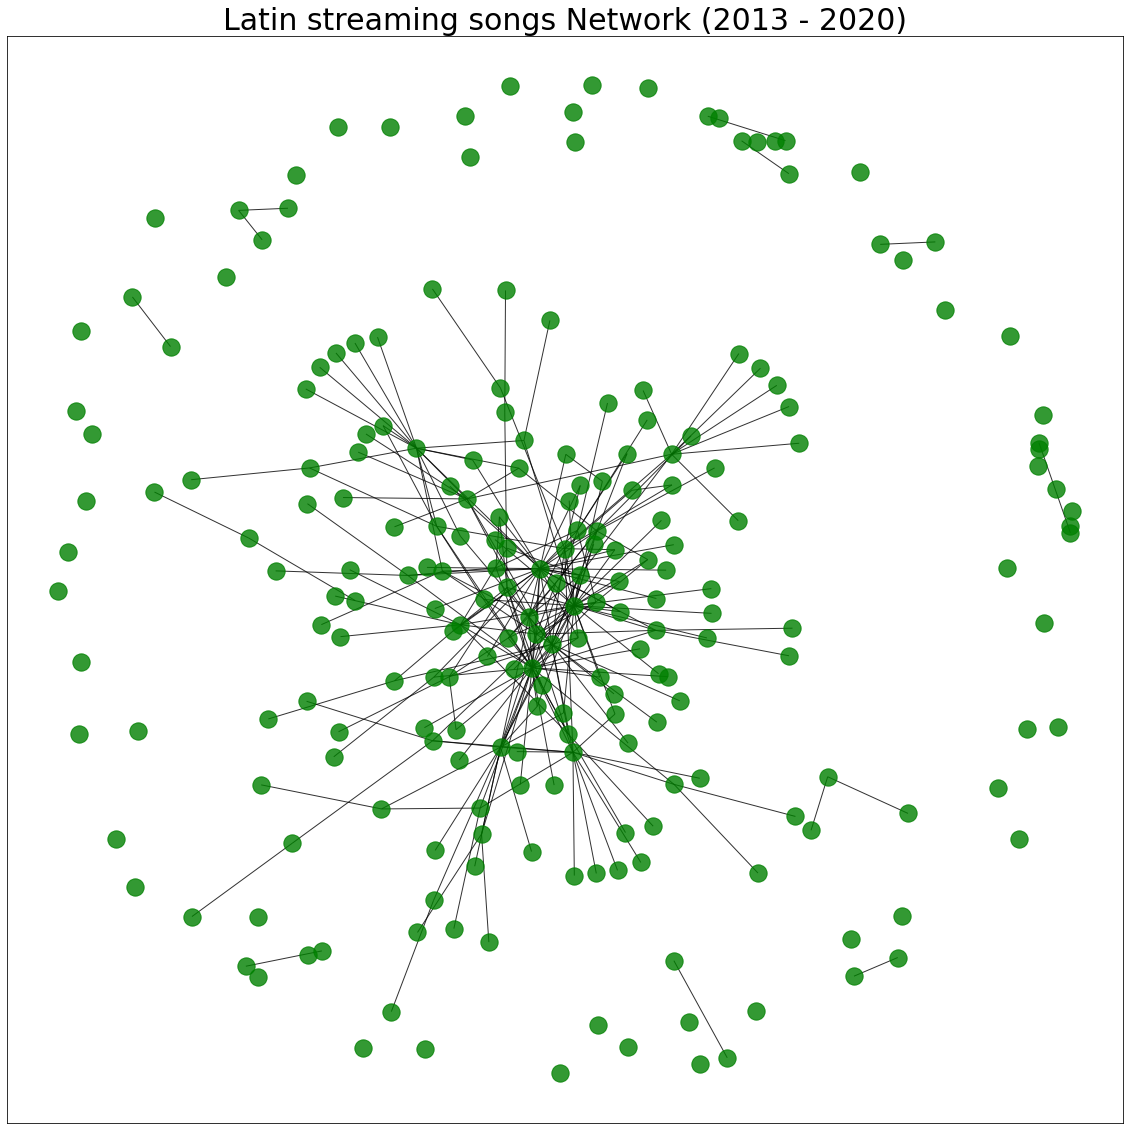

In [97]:
#Network at a glance
plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G_2020, k = 0.2) #k parameter adjusts the distance among nodes
nx.draw_networkx(G_2020, pos = pos, with_labels = False, node_color = 'green', node_size = 300, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2020)', fontsize = 30)

plt.savefig('Ntwk 2013-2020.png', dpi = 300, bbox_inches='tight')

### 2. Degre distribution

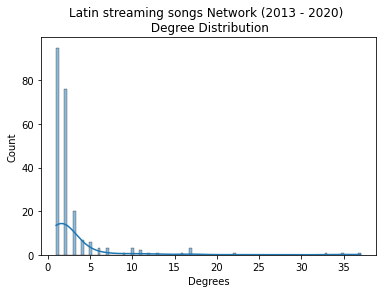

In [98]:
degree_2020 = pd.DataFrame(G_2020.degree, columns = ['source', 'degree']).sort_values('degree', ascending = False)
sns.histplot(degree_2020['degree'], kde = True)
plt.title('Latin streaming songs Network (2013 - 2020) \n Degree Distribution')
plt.xlabel('Degrees')
plt.savefig('Degree distribution 2020.png', dpi = 300, bbox_inches='tight')

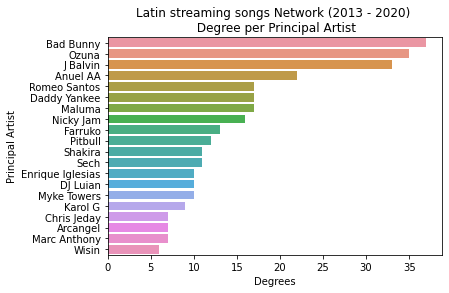

In [99]:
sns.barplot(x = 'degree', y = 'source', data = degree_2020.head(20))
plt.ylabel('Principal Artist')
plt.xlabel('Degrees')
plt.title('Latin streaming songs Network (2013 - 2020) \n Degree per Principal Artist')
plt.savefig('Degree per artist 2020.png', dpi = 300, bbox_inches='tight')

### 3. Local centrality measures

In [100]:
#Betweenness
betweenness_2020 = nx.betweenness_centrality(G_2020, normalized = False)
betweenness_2020 = sorted(betweenness_2020.items(), key = lambda x: x[1], reverse = True)[0:10]
betweenness_2020

[('J Balvin', 3076.094040311404),
 ('Ozuna', 2970.5869584534444),
 ('Bad Bunny', 2662.5503676916046),
 ('Anuel AA', 1687.9775397041683),
 ('Daddy Yankee', 1185.0503012103957),
 ('Romeo Santos', 1126.1502321350151),
 ('Maluma', 1049.8449939801606),
 ('Pitbull', 1016.8793706293707),
 ('Shakira', 759.457894882895),
 ('Enrique Iglesias', 692.8357048748353)]

In [101]:
#Eigenvector centrality
eigenvector = nx.eigenvector_centrality(G_2020)
sorted(eigenvector.items(), key=lambda x: x[1], reverse = True)[0:10]

[('Bad Bunny', 0.36734250643467997),
 ('Ozuna', 0.36062436525336106),
 ('J Balvin', 0.3387829669011397),
 ('Anuel AA', 0.29655268934026335),
 ('Nicky Jam', 0.284862320646174),
 ('Sech', 0.2203702934129937),
 ('Daddy Yankee', 0.21026025295845885),
 ('Karol G', 0.1776960705477185),
 ('Farruko', 0.1657402855906065),
 ('Romeo Santos', 0.1621568793125269)]

In [102]:
#Closeness
closeness_2020 = nx.closeness_centrality(G_2020)
closeness_2020 = sorted(closeness_2020.items(), key=lambda x: x[1], reverse = True)[0:10]
closeness_2020

[('J Balvin', 0.3104466592838686),
 ('Ozuna', 0.3063752276867031),
 ('Anuel AA', 0.29854455094071713),
 ('Bad Bunny', 0.29759377211606514),
 ('Nicky Jam', 0.2920138888888889),
 ('Sech', 0.27646285338593035),
 ('Karol G', 0.26774912448264887),
 ('Farruko', 0.26471514006924773),
 ('Daddy Yankee', 0.2639673571876962),
 ('Tainy', 0.2595679012345679)]

In [103]:
#Local clustering 

#find the nodes with the most triangles
triangles_2020 = nx.triangles(G_2020) 
triangles_2020 = sorted(triangles_2020.items(), key=lambda x:x[1], reverse=True)[0:10]
triangles_2020

[('Ozuna', 40),
 ('Bad Bunny', 36),
 ('J Balvin', 36),
 ('Nicky Jam', 33),
 ('Anuel AA', 31),
 ('Sech', 23),
 ('Daddy Yankee', 18),
 ('Romeo Santos', 11),
 ('Karol G', 10),
 ('Farruko', 8)]

In [104]:
#Local clustering

#Now, we can use clustering() to find the local clustering coefficient for these nodes:
clustering = nx.clustering(G_2020)
[(x, clustering[x]) for x in sorted(nodes, key=lambda x:eigenvector[x], reverse=True)[0:10]]

[('Bad Bunny', 0.06050420168067227),
 ('Ozuna', 0.07575757575757576),
 ('J Balvin', 0.07741935483870968),
 ('Anuel AA', 0.1631578947368421),
 ('Nicky Jam', 0.3626373626373626),
 ('Sech', 0.41818181818181815),
 ('Daddy Yankee', 0.17142857142857143),
 ('Karol G', 0.47619047619047616),
 ('Farruko', 0.14545454545454545),
 ('Romeo Santos', 0.10476190476190476)]

### 4. Global structure of the network

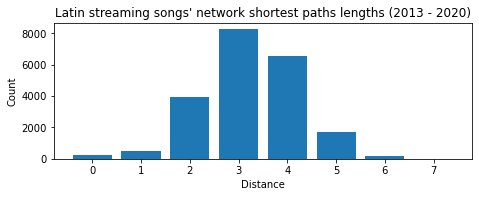

In [105]:
#Path length histogram   
#Now we create the histogram
plt.figure(figsize=(7.5, 2.5))
path_length_histogram(G_2020, title = "Latin streaming songs' network shortest paths lengths (2013 - 2020)")
plt.savefig('Shortest paths lengths 2020.png', dpi = 300, bbox_inches='tight')

plt.show()

In [106]:
#In the same sense of finding the shortest paths, I now calculate the mean shortest path, also known as the
#characteristic length of the giant component (because the whole graph is not connected)

gGcc = sorted(nx.connected_components(G_2020), key=len, reverse=True)
G0_2020 = G_2020.subgraph(gGcc[0]) #giant component
average_shortest_path_length_2020 = nx.average_shortest_path_length(G0_2020)
average_shortest_path_length_2020

3.267264997638167

In [107]:
#Diameter (largest path length) of the giant component
diameter_2020 = nx.diameter(G0_2020)
diameter_2020

7

In [108]:
#Global clustering (giant component)
g_clustering_2020 = nx.average_clustering(G0_2020)
g_clustering_2020

0.12063993296989715

In [109]:
#Resilence ---> density
density_2020 = nx.density(G0_2020)
density_2020

0.025318847425602267

In [110]:
#Connectivity (of the giant component)
print('Min node cut:', nxcon.minimum_node_cut(G0_2020))
print('Min edge cut:', nxcon.minimum_edge_cut(G0_2020))

Min node cut: {'J Balvin'}
Min edge cut: {('J Balvin', 'Sky')}


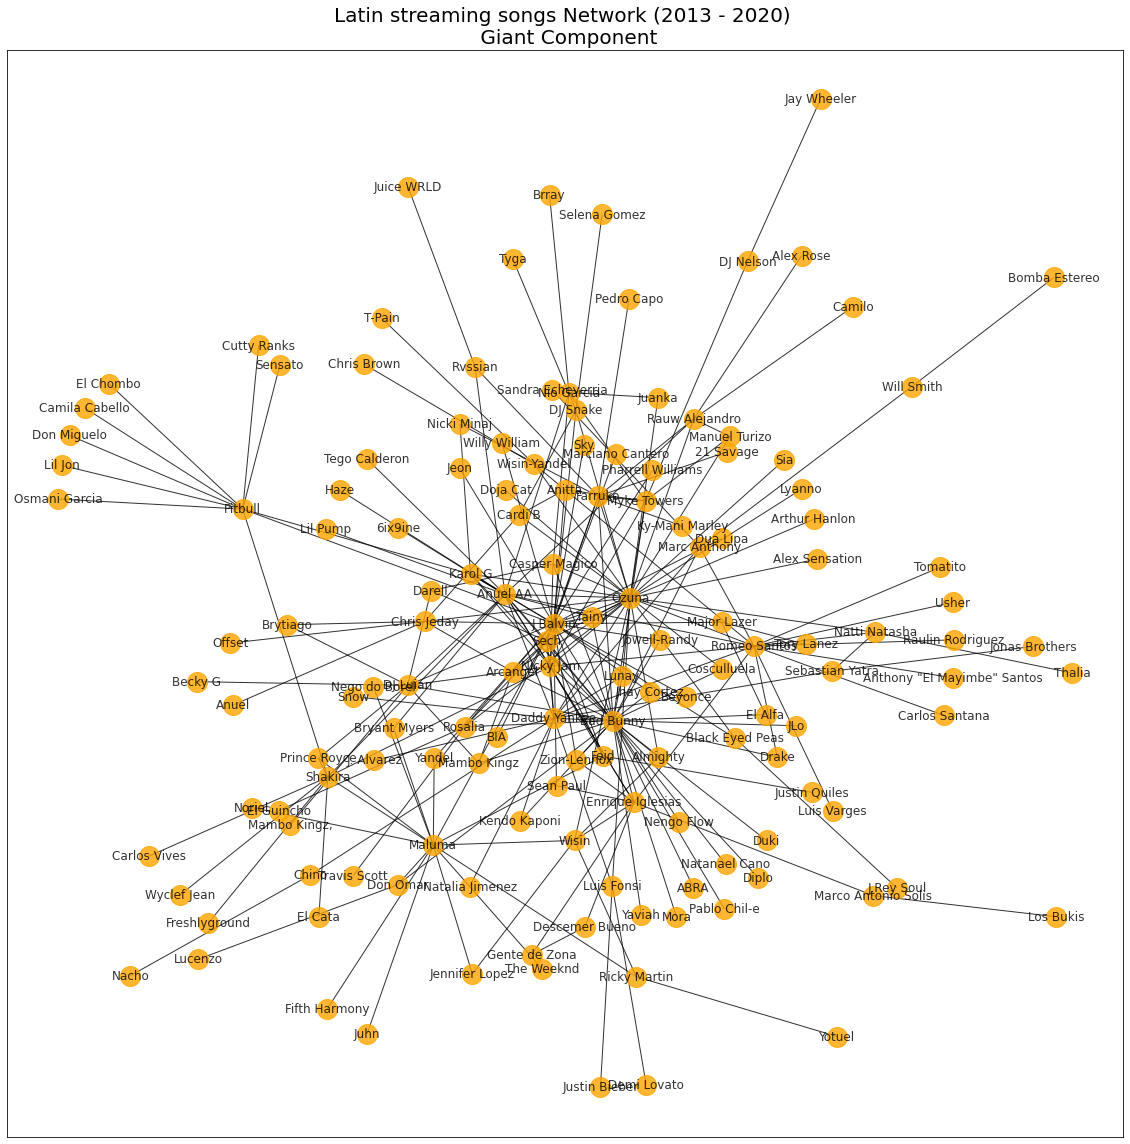

In [111]:
#Graph giant component
plt.figure(figsize=(20, 20))
pos2 = nx.spring_layout(G0_2020, k = 0.2)
nx.draw_networkx(G0_2020, pos = pos2, with_labels = True, node_color = 'orange', node_size = 400, alpha = 0.8)
plt.title('Latin streaming songs Network (2013 - 2020) \n Giant Component', fontsize = 20)

plt.savefig('Giant Component 2013-2020.png', dpi = 300, bbox_inches='tight')

### 5. Community detection

In [112]:
#In order to find the communities, I will use the giant component only
communities = sorted(greedy_modularity_communities(G0_2020), key = len, reverse = True) 
# Count the communities 
comm_2020 = len(communities)
comm_2020

6

In [113]:
#Now that these helper functions have been defined, the following code can be used to annotate nodes and edges 
#with their communities, and find the corresponding colors:

# Set node and edge communities
set_node_community(G0_2020, communities) 
set_edge_community(G0_2020)

#Set community color for nodes 
node_color = [get_color(G0_2020.nodes[v]['community']) for v in G0_2020.nodes]

# Set community color for external and internal edges
external = [(v, w) for v, w in G0_2020.edges if G0_2020.edges[v, w]['community'] == 0]

internal = [(v, w) for v, w in G0_2020.edges if G0_2020.edges[v, w]['community'] > 0]

internal_color = [get_color(G0_2020.edges[e]['community']) for e in internal]

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

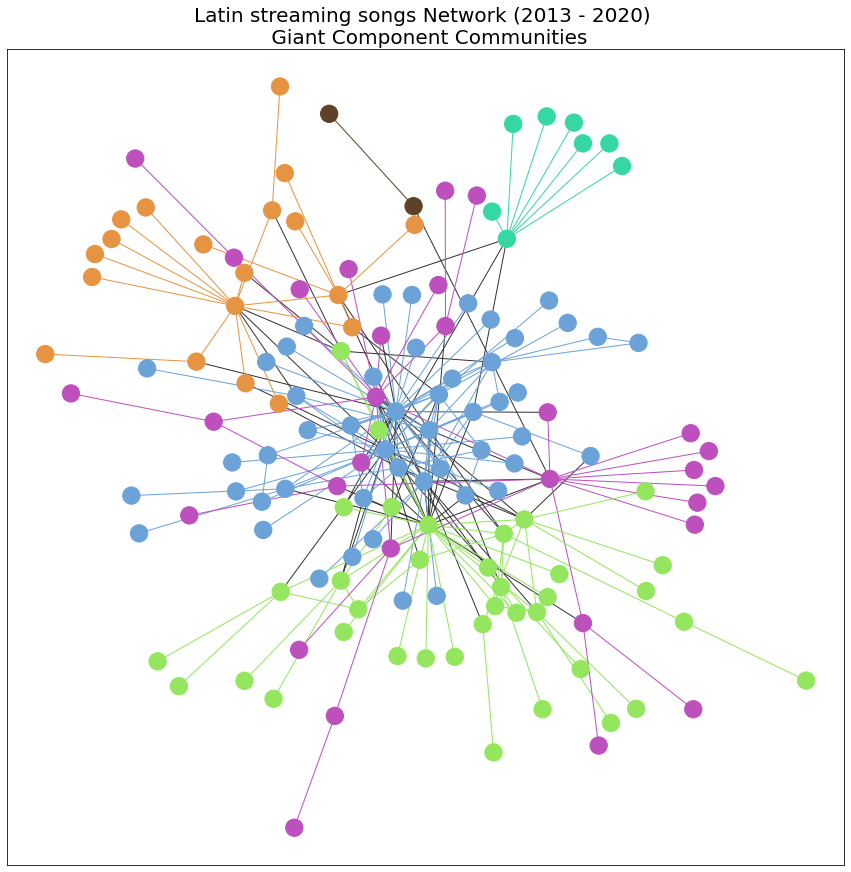

In [114]:
plt.figure(figsize=(15, 15))
pos3 = nx.spring_layout(G0_2020, k = 0.2)
# Draw external edges
nx.draw_networkx(G0_2020, pos = pos3, node_size = 0, edgelist = external, edge_color = "#333333", with_labels = False)
# Draw nodes and internal edges
nx.draw_networkx(G0_2020, pos = pos3, node_color = node_color, edgelist = internal, edge_color = internal_color, 
                with_labels = False)
plt.title('Latin streaming songs Network (2013 - 2020) \n Giant Component Communities', fontsize = 20)

plt.savefig('Communities Giant Component 2013-2020.png', dpi = 300, bbox_inches='tight')

plt

# 3. Analisys of the local and global centrality measures

## 1. Local Measures

The analysis I will do for local measures will be supported by plots, therefore I have to transform all saved objectos into a DF so I can plot them

In [115]:
#Betweenness
betweenness_all = betweenness + betweenness_2016 + betweenness_2018 + betweenness_2020
betweenness_all = pd.DataFrame(betweenness_all, columns = ['Artist_B', 'Betweenness_Centrality'])

import itertools as it
Year = [list(map(str.upper, it.repeat('2013-2014', 10))), list(map(str.upper, it.repeat('2013-2016', 10))),
        list(map(str.upper, it.repeat('2013-2018', 10))), list(map(str.upper, it.repeat('2013-2020', 10)))]
Year = [item for sublist in Year for item in sublist]

betweenness_all['Year'] = Year

betweenness_all = betweenness_all[['Year', 'Artist_B', 'Betweenness_Centrality']]

betweenness_all.head()

,Year,Artist_B,Betweenness_Centrality
0,2013-2014,Romeo Santos,59.0
1,2013-2014,Enrique Iglesias,29.0
2,2013-2014,Marc Anthony,11.0
3,2013-2014,Shakira,9.0
4,2013-2014,Pitbull,4.0


In [116]:
#Closeness 
closeness_all = closeness + closeness_2016 + closeness_2018 + closeness_2020
closeness_all = pd.DataFrame(closeness_all, columns = ['Artist_C', 'Closeness_Centrality'])
closeness_all['Year'] = Year
closeness_all = closeness_all[['Year', 'Artist_C', 'Closeness_Centrality']]
closeness_all.head()

,Year,Artist_C,Closeness_Centrality
0,2013-2014,Romeo Santos,0.120000
1,2013-2014,Enrique Iglesias,0.091429
2,2013-2014,Marc Anthony,0.076800
3,2013-2014,Raulin Rodriguez,0.071111
4,2013-2014,"Anthony ""El Mayimbe"" Santos",0.071111


In [117]:
#Triangles
triangles_all = triangles + triangles_2016 + triangles_2018 + triangles_2020
triangles_all = pd.DataFrame(triangles_all, columns = ['Artist_T', 'Triangles'])
triangles_all['Year'] = Year
triangles_all = triangles_all[['Year', 'Artist_T', 'Triangles']]
triangles_all.head()

,Year,Artist_T,Triangles
0,2013-2014,Descemer Bueno,1
1,2013-2014,Gente de Zona,1
2,2013-2014,Enrique Iglesias,1
3,2013-2014,Alejandro Fernandez,0
4,2013-2014,Christina Aguilera,0


In [118]:
#Export the df to a one excel file
#Change directory to save the tables
os.chdir(r'C:\Users\Francisco Martínez\Desktop\Economía de redes\Trabajo final - Empírico\Data\Output')
with pd.ExcelWriter('Local_measures.xlsx') as writer:  
    betweenness_all.to_excel(writer, sheet_name='Betweenness')
    closeness_all.to_excel(writer, sheet_name='Closeness')
    triangles_all.to_excel(writer, sheet_name='Triangles')

## 2. Global Measures

In the whole notebook I have been working with two-year cohorts to analyzie the network, however, I realized that it is better to have global measures for each year from 2013 to 2020. Therefore, in this section, I will create a graph for every year and only use global measures sucha as: shortest path, clustering, diamenter, density, and number of comunnities, so I can have smoother plots. I will not display any graph, only the plots regarding the measures mentioned before.

### 2.1 Creating a graph for each year from 2013 to 2020.

In [119]:
average_shortest_path_length = []
diameter = []
g_clustering = []
density = []

years2 = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
for x in years2:
    #Filter dataframe
    latin2 = latin[latin['Year'] == x]
    #Select artists
    singers = latin2[['Principal', 'Collaborator']]
    singers = singers.rename(columns = {'Principal': 'source', 'Collaborator': 'target'})
    singers = singers.groupby(['source', 'target']).size().rename('weight').reset_index()
    #Prepare nodes
    nodes1 = list(singers['source'].unique())
    nodes2 = list(singers['target'].unique())
    nodes = nodes1 + nodes2
    nodes = list(set(nodes))
    #Create the graph
    H = nx.Graph()
    #Add the nodes to the graph
    H.add_nodes_from(nodes)
    #No we add the edges
    H = nx.from_pandas_edgelist(singers,
                            source='source',
                            target='target',
                            edge_attr='weight')
    #Extract giant component
    gHcc = sorted(nx.connected_components(H), key=len, reverse=True)
    H = H.subgraph(gHcc[0]) 
    ##Global measures
    #Avergae shortest path
    average_shortest_path_length.append(nx.average_shortest_path_length(H))
    #Diameter (largest path length) of the giant component
    diameter.append(nx.diameter(H))
    #Global clustering (giant component)
    g_clustering.append(nx.average_clustering(H))
    #Resilence ---> density
    density.append(nx.density(H))

### 2.2 Ploting the global measures.

In [120]:
#In this section I will use only images, therefore, it is nenesarry to change the directory to the images folder
os.chdir(r'C:\Users\Francisco Martínez\Desktop\Economía de redes\Trabajo final - Empírico\Imágenes')

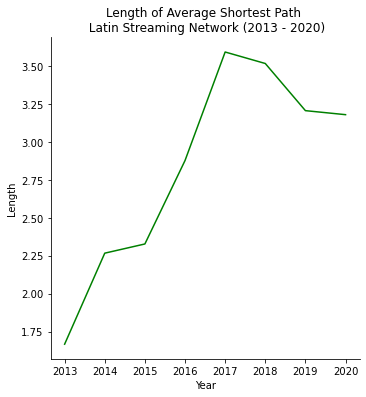

In [121]:
#Shortest paths to df
shortest_path = pd.DataFrame(list(zip(years2, average_shortest_path_length)), columns =['Year', 'Shortest_Path'])

#Plot
ax = sns.relplot(data = shortest_path, x = "Year", y = "Shortest_Path", kind="line", color = 'green')
ax.set(ylabel='Length', title = "Length of Average Shortest Path \n Latin Streaming Network (2013 - 2020)")

plt.savefig('All shortest path.png', dpi = 300, bbox_inches='tight')

plt.show(ax)

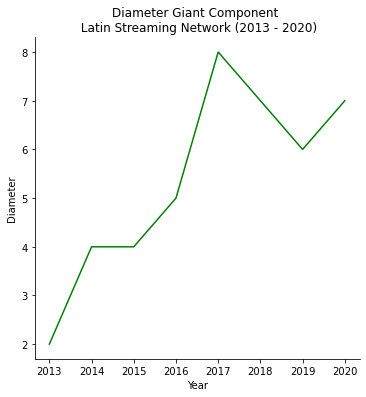

In [122]:
#Diameter to df
diameter0 = pd.DataFrame(list(zip(years2, diameter)), columns =['Year', 'Diameter'])

#Plot
ax = sns.relplot(data = diameter0, x = "Year", y = "Diameter", kind="line", color = 'green')
ax.set(ylabel='Diameter', title = "Diameter Giant Component \n Latin Streaming Network (2013 - 2020)")

plt.savefig('All Diameter.png', dpi = 300, bbox_inches='tight')

plt.show(ax)

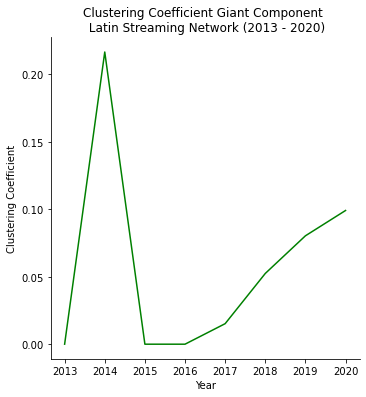

In [123]:
#Global clustering to df
g_clustering0 = pd.DataFrame(list(zip(years2, g_clustering)), columns =['Year', 'Clustering'])

#Plot
ax = sns.relplot(data = g_clustering0, x = "Year", y = "Clustering", kind='line', color = 'green')
ax.set(ylabel='Clustering Coefficient', 
       title = "Clustering Coefficient Giant Component \n Latin Streaming Network (2013 - 2020)")

plt.savefig('All Clustering.png', dpi = 300, bbox_inches='tight')

plt.show(ax)

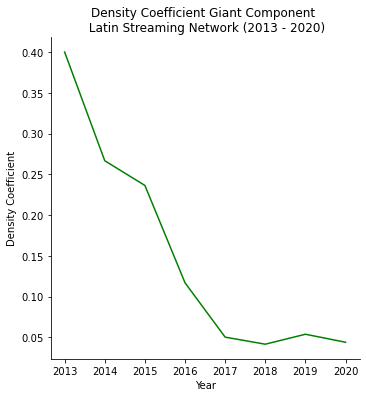

In [124]:
#Density to df
density0 = pd.DataFrame(list(zip(years2, density)), columns =['Year', 'Density'])

#Plot
ax = sns.relplot(data = density0, x = "Year", y = "Density", kind="line", color = 'green')
ax.set(ylabel='Density Coefficient', title = "Density Coefficient Giant Component \n Latin Streaming Network (2013 - 2020)")

plt.savefig('All Diameter.png', dpi = 300, bbox_inches='tight')

plt.show(ax)